<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch4_CompositeIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Composite integration
In particular, composite **Newton Cotes** formulas

This builds off the [integration (non-composite) notebook](Ch4_integration.ipynb)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})

Integral I is 1.751


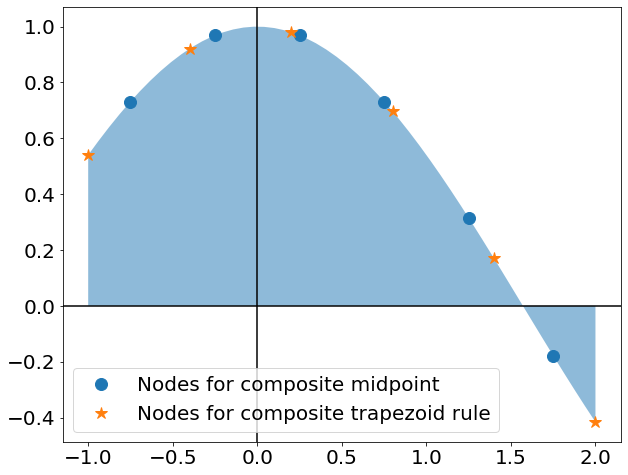

In [11]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2


# Other examples to try
# f = lambda x : x**(3/2)
# F = lambda x : 2/5*x**(5/2)
# a,b = 0,1

# f = lambda x : 1/(1+x**2)  # aka Runge's function
# F = lambda x : np.arctan(x)
# a,b = -5,5



I   = F(b) - F(a)
print("Integral I is {:.3f}".format(I))

x = np.linspace(a,b)
plt.figure(figsize=(10,8)) 
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');

# Let's practice different types of nodes
n   = 5  # so n+1 = 6 nodes

# For composite midpoint, we have a + h/2, a + 3h/2, etc.
h   = (b-a)/(n+1)
nodesMidpoint = np.arange( a+h/2, b, step=h)
plt.plot( nodesMidpoint, f(nodesMidpoint), 'o', markersize=12,label="Nodes for composite midpoint");

# For composite trapezoidal rule, use closed nodes
nodesTrapezoidal, h = np.linspace(a,b,n+1,retstep=True) # don't forget the +1
plt.plot( nodesTrapezoidal, f(nodesTrapezoidal), '*',markersize=12, label="Nodes for composite trapezoid rule");

plt.legend();

In [34]:
def CompositeMidpoint( f, a, b, n ):
  h   = (b-a)/(n+1)  # this is \tilde{h} in the notes
  nodes = np.arange( a+h/2, b, step=h)
  return h*np.sum(f(nodes))

def CompositeTrapezoidal( f, a, b, n):
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y  = f(nodes)
  return h*( np.sum(y) - (y[0]+y[-1])/2) # y[-1] is last element; in Matlab, this is y(end)

def CompositeSimpson( f, a, b, n):
  n = int(n/2)*2  # Make it even
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y = f(nodes)
  return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] ) # in Matlab, it is a:step:b whereas in Python it is a:b:step and not inclusive of b

## And let's apply these rules to a nice problem
$$\int_{a=-1}^{b=2}\Big( f(x) = \cos(x) \Big) dx $$

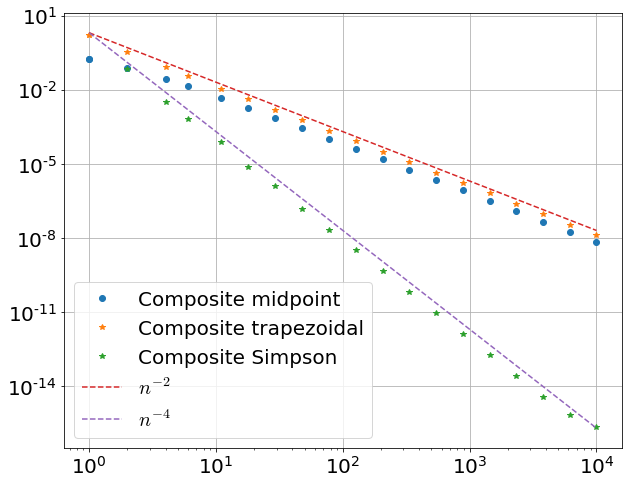

In [44]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.loglog( nList, 2/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, 2/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend();

## Try other problems
Try $$\int_{a=0}^{b}\Big( f(x) = \cos^2(x) \Big) dx = \frac14\sin(2x)+\frac12x\Big|_{a}^b$$
for both $b=3.14$ and $b=\pi$

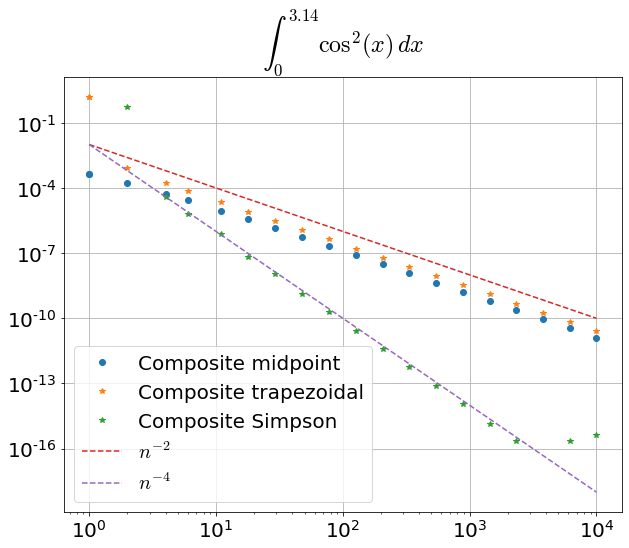

In [69]:
f = lambda x : np.cos(x)**2
F = lambda x : np.sin(2*x)/4 + x/2  # dF/dx = f
a,b = 0,3.14
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.loglog( nList, .01/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, .01/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend();
plt.title('$\int_0^{3.14} \cos^2(x)\,dx$');

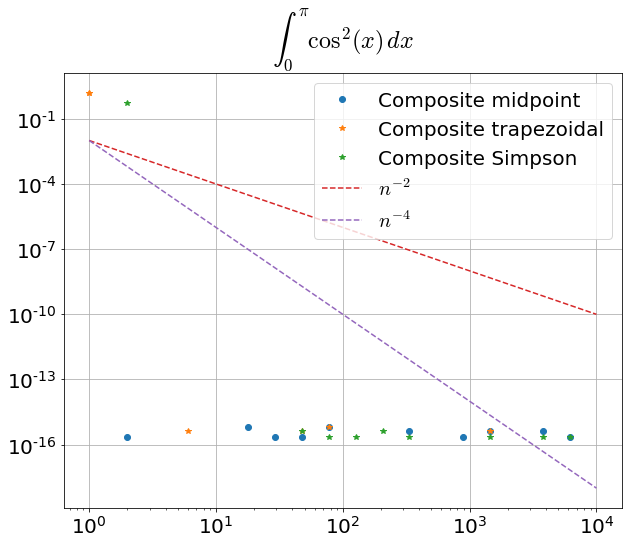

In [71]:
f = lambda x : np.cos(x)**2
F = lambda x : np.sin(2*x)/4 + x/2  # dF/dx = f
a,b = 0,np.pi  # Changing this
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.loglog( nList, .01/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, .01/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend();
plt.title('$\int_0^{\pi} \cos^2(x)\,dx$');

### What's going on? Why is there such a big difference using $b=\pi$ rather than $b=3.14$?

When the function is periodic, we get spectral accuracy. Our simple composite formulas are equivalent to composite formulas of arbitrarily high order.  Also, there's no Runge phenomenon to worry about.  We couldn't improve accuracy by using non-equispaced nodes.

In [ ]:
x   = np.linspace(a,np.pi,100)
plt.figure( figsize=(10,8)) 
plt.plot( x, f(x), '-', label="$\cos^2(x)$" )
plt.legend();
plt.axvline(color='k');
plt.axhline(color='k');

## What about other functions?
Try:
- $f(x) = x^{5/2}$. Is Simpson's rule still much better than the trapezoidal/composite rules?
- $f(x) = x^{3/2}$. Is Simpson's rule still much better than the trapezoidal/composite rules?
- $f(x) = |x|$. What's the convergence rate?
- $f(x) = 1/(1+x^2)$ (Runge's function). Is this as bad as it was for the non-composite rules?

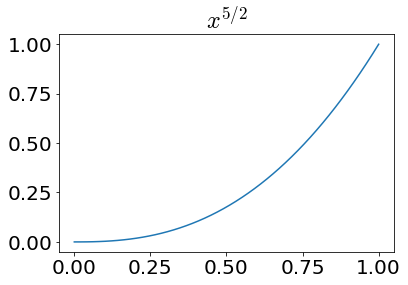

In [94]:
name = '$x^{5/2}$'
f = lambda x : x**(5/2)
F = lambda x : 2/7*x**(7/2)
a,b = 0,1
I   = F(b)-F(a)

x = np.linspace(a,b);
plt.plot( x, f(x));
plt.title(name);

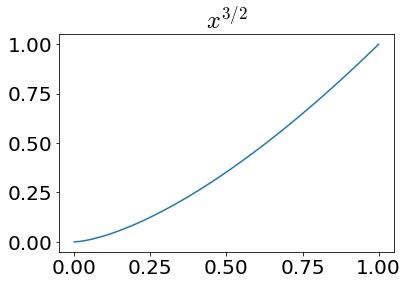

In [95]:
name = '$x^{3/2}$'
f = lambda x : x**(3/2)
F = lambda x : 2/5*x**(5/2)
a,b = 0,1
I   = F(b)-F(a)

x = np.linspace(a,b);
plt.plot( x, f(x));
plt.title(name);

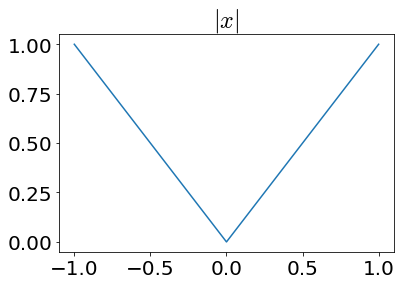

In [96]:
name = '$|x|$'
f = lambda x : np.abs(x)
F = lambda x : (-1)**( x<0)*x**2/2
a,b = -1,1
I   = F(b)-F(a)

x = np.linspace(a,b,51);
plt.plot( x, f(x));
plt.title(name);

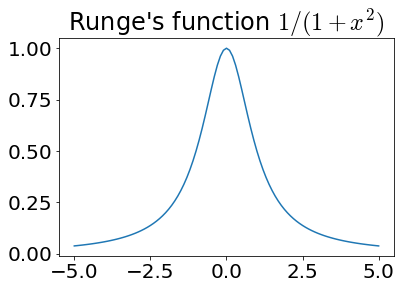

In [97]:
# Runge's function
name = "Runge's function $1/(1+x^2)$"
f = lambda x : 1/(1+x**2)
F = lambda x : np.arctan(x)
a,b = -5,5
I   = F(b)-F(a)

x = np.linspace(a,b,101);
plt.plot( x, f(x));
plt.title(name);

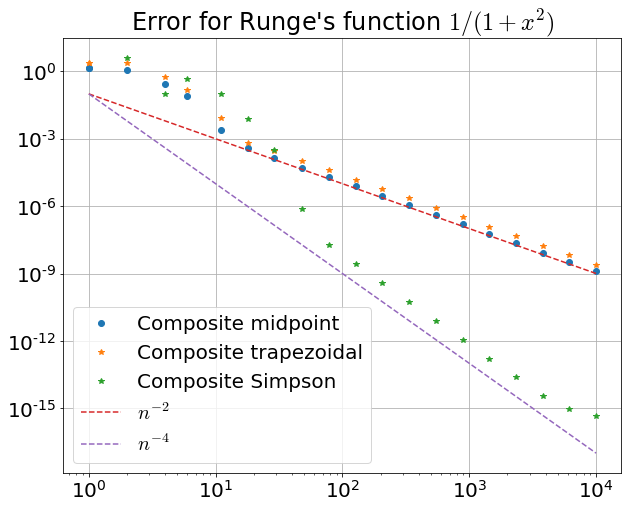

In [102]:
nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.loglog( nList, .1/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, .1/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend();
plt.title("Error for "+ name);